In this file, 
I first merged all the data files into one. 
Then, I conducted EDA to analyze the data, selected columns to keep, and removed unnecessary ones. After that, I performed data preprocessing. 
I initially ran a random forest model, which showed signs of overfitting. 
So, I conducted hyperparameter tuning and did 5-fold cross-validation.
As a result, I achieved a final accuracy of 92% in prediction of 'label'

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('CTU-IoT-Malware-Capture-21-1conn.log.labeled.csv', sep='|')
df.to_csv('file10.csv', index=False)

In [2]:
file1 = pd.read_csv('file1.csv')
file2 = pd.read_csv('file2.csv')
file3 = pd.read_csv('file3.csv')
file4 = pd.read_csv('file4.csv')
file5 = pd.read_csv('file5.csv')
file6 = pd.read_csv('file6.csv')
file7 = pd.read_csv('file7.csv')
file8 = pd.read_csv('file8.csv')
file9 = pd.read_csv('file9.csv')
file10 = pd.read_csv('file10.csv')

In [12]:
file_names = ['file1.csv', 'file2.csv', 'file3.csv', 'file4.csv', 'file5.csv', 'file6.csv', 'file7.csv', 'file8.csv', 'file9.csv', 'file10.csv']
merged_data = pd.DataFrame()

for file_name in file_names:
    data = pd.read_csv(file_name)
    merged_data = merged_data.append(data, ignore_index=True)

C:\Users\ditis\AppData\Local\Temp\ipykernel_4652\703237554.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(data, ignore_index=True)
C:\Users\ditis\AppData\Local\Temp\ipykernel_4652\703237554.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(data, ignore_index=True)
C:\Users\ditis\AppData\Local\Temp\ipykernel_4652\703237554.py:5: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_name)
C:\Users\ditis\AppData\Local\Temp\ipykernel_4652\703237554.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(data, ignore_index=True)
C:\Users\ditis\AppData\L

In [13]:
merged_data.to_csv('merged_file.csv', index=False)

In [2]:
df = pd.read_csv('merged_file.csv')

C:\Users\ditis\AppData\Local\Temp\ipykernel_11752\3079723760.py:1: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('merged_file.csv')


In [8]:
df.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1.532510e+09,19934032,8939,40008.0,8943739,123.0,2,0,0.004751,48,...,-,0.0,Dd,1.0,76.0,1.0,76.0,-,Benign,-
1,1.532511e+09,15590805,8937,57849.0,6143508,22.0,1,0,108.421563,2376,...,-,0.0,DAd,5.0,332.0,2.0,200.0,-,Benign,-
2,1.532512e+09,10360058,8937,59670.0,6143508,22.0,1,0,0.001244,21,...,-,0.0,SAD,3.0,189.0,0.0,0.0,-,Benign,-
3,1.532512e+09,6393320,8937,59701.0,6143508,22.0,1,0,0.000738,21,...,-,0.0,SAD,3.0,189.0,0.0,0.0,-,Benign,-
4,1.532512e+09,3458377,8939,36199.0,6143506,53.0,2,2,-,-,...,-,0.0,D,1.0,58.0,0.0,0.0,-,Benign,-


In [52]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24100363 entries, 0 to 24100362
Data columns (total 17 columns):
 #   Column         Dtype  
---  ------         -----  
 0   ts             float64
 1   id.orig_h      int64  
 2   id.orig_p      float64
 3   id.resp_h      int64  
 4   id.resp_p      float64
 5   proto          int64  
 6   service        int64  
 7   duration       int64  
 8   orig_bytes     int64  
 9   resp_bytes     int64  
 10  conn_state     int64  
 11  history        int64  
 12  orig_pkts      float64
 13  orig_ip_bytes  float64
 14  resp_pkts      float64
 15  resp_ip_bytes  float64
 16  label          int64  
dtypes: float64(7), int64(10)
memory usage: 3.1 GB
None
                 ts     id.orig_h     id.orig_p     id.resp_h     id.resp_p  \
count  2.410036e+07  2.410036e+07  2.410036e+07  2.410036e+07  2.410036e+07   
mean   1.545444e+09  8.936261e+03  3.991308e+04  5.619226e+06  9.713553e+03   
std    1.200337e+07  1.986551e+02  1.609006e+04  3.063336e+0

In [4]:
df.isnull().sum()

ts                      0
uid                     0
id.orig_h               0
id.orig_p               0
id.resp_h               0
id.resp_p               0
proto                   0
service                 0
duration                0
orig_bytes              0
resp_bytes              0
conn_state              0
local_orig              0
local_resp              0
missed_bytes            0
history                 0
orig_pkts               0
orig_ip_bytes           0
resp_pkts               0
resp_ip_bytes           0
tunnel_parents          0
label                   0
detailed-label    9173939
dtype: int64

In [5]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['uid', 'id.orig_h', 'id.resp_h', 'proto', 'service', 'duration',
       'orig_bytes', 'resp_bytes', 'conn_state', 'local_orig', 'local_resp',
       'history', 'tunnel_parents', 'label', 'detailed-label'],
      dtype='object')


In [6]:
column_names = df.columns
print(column_names)

Index(['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p',
       'proto', 'service', 'duration', 'orig_bytes', 'resp_bytes',
       'conn_state', 'local_orig', 'local_resp', 'missed_bytes', 'history',
       'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes',
       'tunnel_parents', 'label', 'detailed-label'],
      dtype='object')


In [9]:
column_data_types = df.dtypes
print(column_data_types)

ts                float64
uid                 int32
id.orig_h           int32
id.orig_p         float64
id.resp_h           int32
id.resp_p         float64
proto               int32
service             int32
duration           object
orig_bytes         object
resp_bytes         object
conn_state         object
local_orig         object
local_resp         object
missed_bytes      float64
history            object
orig_pkts         float64
orig_ip_bytes     float64
resp_pkts         float64
resp_ip_bytes     float64
tunnel_parents     object
label              object
detailed-label     object
dtype: object


In [10]:
df['duration'] = pd.to_numeric(df['duration'], errors='coerce')
df['orig_bytes'] = pd.to_numeric(df['orig_bytes'], errors='coerce')

In [12]:
unique_values = df['conn_state'].unique()
print(unique_values)

['SF' 'OTH' 'S0' 'S1' 'REJ' 'RSTO' 'RSTR' 'S2' 'SH' 'RSTOS0' 'RSTRH' 'S3'
 'SHR']


In [13]:
df['conn_state'] = df['conn_state'].astype(str)

In [15]:
unique_values = df['label'].unique()
print(unique_values)

['Benign' 'Malicious' 'Malicious   C&C' 'Malicious   DDoS'
 'Malicious   PartOfAHorizontalPortScan' 'Malicious   Attack'
 'Malicious   FileDownload']


In [16]:
df['label'] = df['label'].astype(str)

In [18]:
unique_values = df['detailed-label'].unique()
print(unique_values)

['-' 'PartOfAHorizontalPortScan' 'HeartBeat' nan 'FileDownload' 'C&C'
 'Attack' 'Torii']


In [19]:
df['detailed-label'] = df['detailed-label'].astype(str)

In [20]:
unique_values = df['tunnel_parents'].unique()
print(unique_values)

['-']


In [21]:
df = df.drop(columns=['tunnel_parents'])

In [22]:
unique_values = df['history'].unique()
print(unique_values)

['Dd' 'DAd' 'SAD' 'D' 'ShADa' 'DdA' '-' 'S' 'Sr' 'ShR' 'ShADFr' 'ShADF'
 'ShADadFf' 'ShADaFr' 'ShADadtFf' 'ShA' 'ShAdDafF' 'ShAfFa' 'ShADr'
 'ShAdDfFa' 'ShAFr' 'ShAdDaR' 'ShAdDaFf' 'ShADadfF' 'ShAdDaFRfR'
 'ShAdDafR' 'ShADdfFa' 'ShADar' 'ShAdDaTR' 'HaDdAFf' 'Fa' 'ShAdDaftF'
 'ShAdDaFfR' 'R' '^r' '^hR' 'ShAF' 'ShADdFf' 'ShADdtaFf' 'ShAdDaFRf'
 'ShADdFaf' 'ShADaF' 'ShADadtRf' 'ShADadftFR' 'ShAr' 'SaR' 'ShAdDtaR'
 'ShAdDtafF' 'FfA' 'F' 'ShADrfR' 'ShAdDar' 'ShAdfDr' 'DdAaFf' 'C' '^c'
 'ShAdDaT' 'ShADadttfF' 'ShAdDafr' 'ShAdr' 'ShAdDaFR' 'ShAfr' 'ShAdFaRf'
 'ShAfFr' 'ShAdDaTFf' 'ShAdfFa' 'ShAaww' 'ShwAr' 'ShwA' 'ShAaw'
 'ShAdDaTfr' 'ShAfdtF' 'ShAdDaRr' 'ShAdDaTfRr' 'ShAfF' 'ShAfdtFa' 'ShAdfr'
 'ShAdDaRR' 'ShArr' 'ShAdDR' 'ShAdDatRRR' 'ShADadfr' 'ShAdDatR'
 'ShAdDaTRft' 'ShAdDaTRf' 'ShAdDaTTRf' 'ShAdDaTfR' 'ShAar' 'ShAFa'
 'ShADadtfF' 'ShAdDaTRr' 'ShAdfDF' 'ShAdDaTfF' 'ShAdDaTFR' 'I' 'DTT' 'DT'
 '^dtt' 'DrF' 'DFr' 'ShAdfF' 'ShAdtfFa' 'SI' 'ShAdaDR' 'ShADdfF'
 'ShADdattFfR' 'ShADdf' 'ShADdtat

In [23]:
df['history'] = df['history'].astype(str)

In [24]:
unique_values = df['local_orig'].unique()
print(unique_values)

['-']


In [25]:
df = df.drop(columns=['local_orig'])

In [26]:
unique_values = df['local_resp'].unique()
print(unique_values)

['-']


In [27]:
df = df.drop(columns=['local_resp'])

In [28]:
unique_values = df['resp_bytes'].unique()
print(unique_values)

['48' '96' '0' '-' '94' '53' '55' '103' '5464' '549' '319' '289' '277'
 '47' '287' '70' '678' '792' '359' '302' '488' '341' '285' '311' '937'
 '338' '268' '578' '330' '306' '695' '49' '392' '68' '80' '1390' '303'
 '561' '1265' '807' '183' '816' '1518' '1451' '312' '798' '800' '457'
 '55565' '666' '294' '298' '300' '699' '58' '409' '307' '317' '723' '624'
 '616' '1189' '308' '570' '1523' '855' '3443' '337' '638' '59' '389' '163'
 '1595' '1276' '407' '957' '2889' '656' '975' '906' '334' '204' '15' '588'
 '1123' '1825' '715' '262' '632' '1037' '87' '228' '69' '168' '215' '280'
 '7525' '320' '203' '206' '146' '127' '485' '202' '503' '353' '216' '213'
 '1302' '196' '844' '2277' '137' '1053' '1122' '2754' '136' '1836' '1859'
 '2076' '936' '604' '365' '377' '40' '404' '994' '650' '416' '271' '269'
 '60' '914' '250' '279' '563' '335' '20' '599' '674' '351' '290' '1954'
 '354' '600' '66' '1328' '529' '385' '191' '30' '608' '139' '126' '140'
 '951' '345' '634' '29' '553' '1072' '367' '804' '643'

In [29]:
df['resp_bytes'] = pd.to_numeric(df['resp_bytes'], errors='coerce')

In [31]:
print(df)

                    ts       uid  id.orig_h  id.orig_p  id.resp_h  id.resp_p  \
0         1.532510e+09  19934032       8939    40008.0    8943739      123.0   
1         1.532511e+09  15590805       8937    57849.0    6143508       22.0   
2         1.532512e+09  10360058       8937    59670.0    6143508       22.0   
3         1.532512e+09   6393320       8937    59701.0    6143508       22.0   
4         1.532512e+09   3458377       8939    36199.0    6143506       53.0   
...                ...       ...        ...        ...        ...        ...   
25000358  1.538659e+09  20194534       8940      123.0    7380822      123.0   
25000359  1.538659e+09  22119480       8940      123.0   11036750      123.0   
25000360  1.538659e+09   8880191       8940      123.0   10387164      123.0   
25000361  1.538659e+09   7128434       8940      123.0   10604949      123.0   
25000362  1.538637e+09   7663097       8940    41186.0    9836670      443.0   

          proto  service      duration 

In [30]:
df.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,detailed-label
0,1.532510e+09,19934032,8939,40008.0,8943739,123.0,2,0,0.004751,48.0,48.0,SF,0.0,Dd,1.0,76.0,1.0,76.0,Benign,-
1,1.532511e+09,15590805,8937,57849.0,6143508,22.0,1,0,108.421563,2376.0,96.0,OTH,0.0,DAd,5.0,332.0,2.0,200.0,Benign,-
2,1.532512e+09,10360058,8937,59670.0,6143508,22.0,1,0,0.001244,21.0,0.0,S0,0.0,SAD,3.0,189.0,0.0,0.0,Benign,-
3,1.532512e+09,6393320,8937,59701.0,6143508,22.0,1,0,0.000738,21.0,0.0,S0,0.0,SAD,3.0,189.0,0.0,0.0,Benign,-
4,1.532512e+09,3458377,8939,36199.0,6143506,53.0,2,2,NaN,NaN,NaN,S0,0.0,D,1.0,58.0,0.0,0.0,Benign,-


In [35]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [34]:
column_data_types = df.dtypes
print(column_data_types)

ts                float64
uid                 int64
id.orig_h           int64
id.orig_p         float64
id.resp_h           int64
id.resp_p         float64
proto               int64
service             int64
duration            int64
orig_bytes          int64
resp_bytes          int64
conn_state          int32
missed_bytes      float64
history            object
orig_pkts         float64
orig_ip_bytes     float64
resp_pkts         float64
resp_ip_bytes     float64
label              object
detailed-label     object
dtype: object


In [36]:
categorical_columns=['history','label','detailed-label']

In [37]:
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [38]:
column_data_types = df.dtypes
print(column_data_types)

ts                float64
uid                 int64
id.orig_h           int64
id.orig_p         float64
id.resp_h           int64
id.resp_p         float64
proto               int64
service             int64
duration            int64
orig_bytes          int64
resp_bytes          int64
conn_state          int32
missed_bytes      float64
history             int32
orig_pkts         float64
orig_ip_bytes     float64
resp_pkts         float64
resp_ip_bytes     float64
label               int32
detailed-label      int32
dtype: object


In [47]:
df.to_csv('preprocessed_dataset.csv', index=False)

In [23]:
subset = df.sample(frac=0.02, random_state=42)
print(subset)

                    ts  id.orig_h  id.orig_p  id.resp_h  id.resp_p  proto  \
7188913   1.569018e+09       8932    36452.0    4209936    62336.0      1   
1442047   1.532540e+09       8939    30589.0    1644922       81.0      1   
10913975  1.551388e+09       8935    46674.0    1227526       23.0      1   
12032591  1.551399e+09       8935    50970.0    8297378       23.0      1   
15157384  1.545422e+09       8933    38388.0    4740336       23.0      1   
...                ...        ...        ...        ...        ...    ...   
16279521  1.545434e+09       8933    47700.0    2164038       23.0      1   
23790530  1.545489e+09       8933    46880.0     199963       23.0      1   
14839093  1.545419e+09       8933    38766.0    2760731       23.0      1   
6406034   1.569018e+09       8932    19685.0    4209936    62336.0      1   
17322698  1.545445e+09       8933    60756.0    8480887       23.0      1   

          service  duration  orig_bytes  resp_bytes  conn_state  history  \

In [2]:
df = pd.read_csv('preprocessed_dataset.csv')

In [3]:
unique_values = df['uid'].unique()
print(unique_values) 

[19934032 15590805 10360058 ...  8880191  7128434  7663097]


In [3]:
df = df.drop(columns=['uid'])

In [4]:
df = df.drop(columns=['detailed-label'])

In [6]:
print(df)

                    ts  id.orig_h  id.orig_p  id.resp_h  id.resp_p  proto  \
0         1.532510e+09       8939    40008.0    8943739      123.0      2   
1         1.532511e+09       8937    57849.0    6143508       22.0      1   
2         1.532512e+09       8937    59670.0    6143508       22.0      1   
3         1.532512e+09       8937    59701.0    6143508       22.0      1   
4         1.532512e+09       8939    36199.0    6143506       53.0      2   
...                ...        ...        ...        ...        ...    ...   
25000358  1.538659e+09       8940      123.0    7380822      123.0      2   
25000359  1.538659e+09       8940      123.0   11036750      123.0      2   
25000360  1.538659e+09       8940      123.0   10387164      123.0      2   
25000361  1.538659e+09       8940      123.0   10604949      123.0      2   
25000362  1.538637e+09       8940    41186.0    9836670      443.0      1   

          service  duration  orig_bytes  resp_bytes  conn_state  history  \

In [11]:
unique_counts = df['missed_bytes'].value_counts()
print(unique_counts)

0.000000e+00    25000331
5.792000e+03           9
2.896000e+03           7
2.472000e+03           2
2.920000e+03           2
1.460000e+03           1
4.500000e+03           1
1.582000e+03           1
1.579000e+03           1
1.908819e+09           1
4.380000e+03           1
8.088000e+03           1
1.448000e+03           1
4.344000e+03           1
8.160000e+03           1
1.440000e+03           1
5.390000e+03           1
Name: missed_bytes, dtype: int64


In [5]:
df = df.drop(columns=['missed_bytes'])

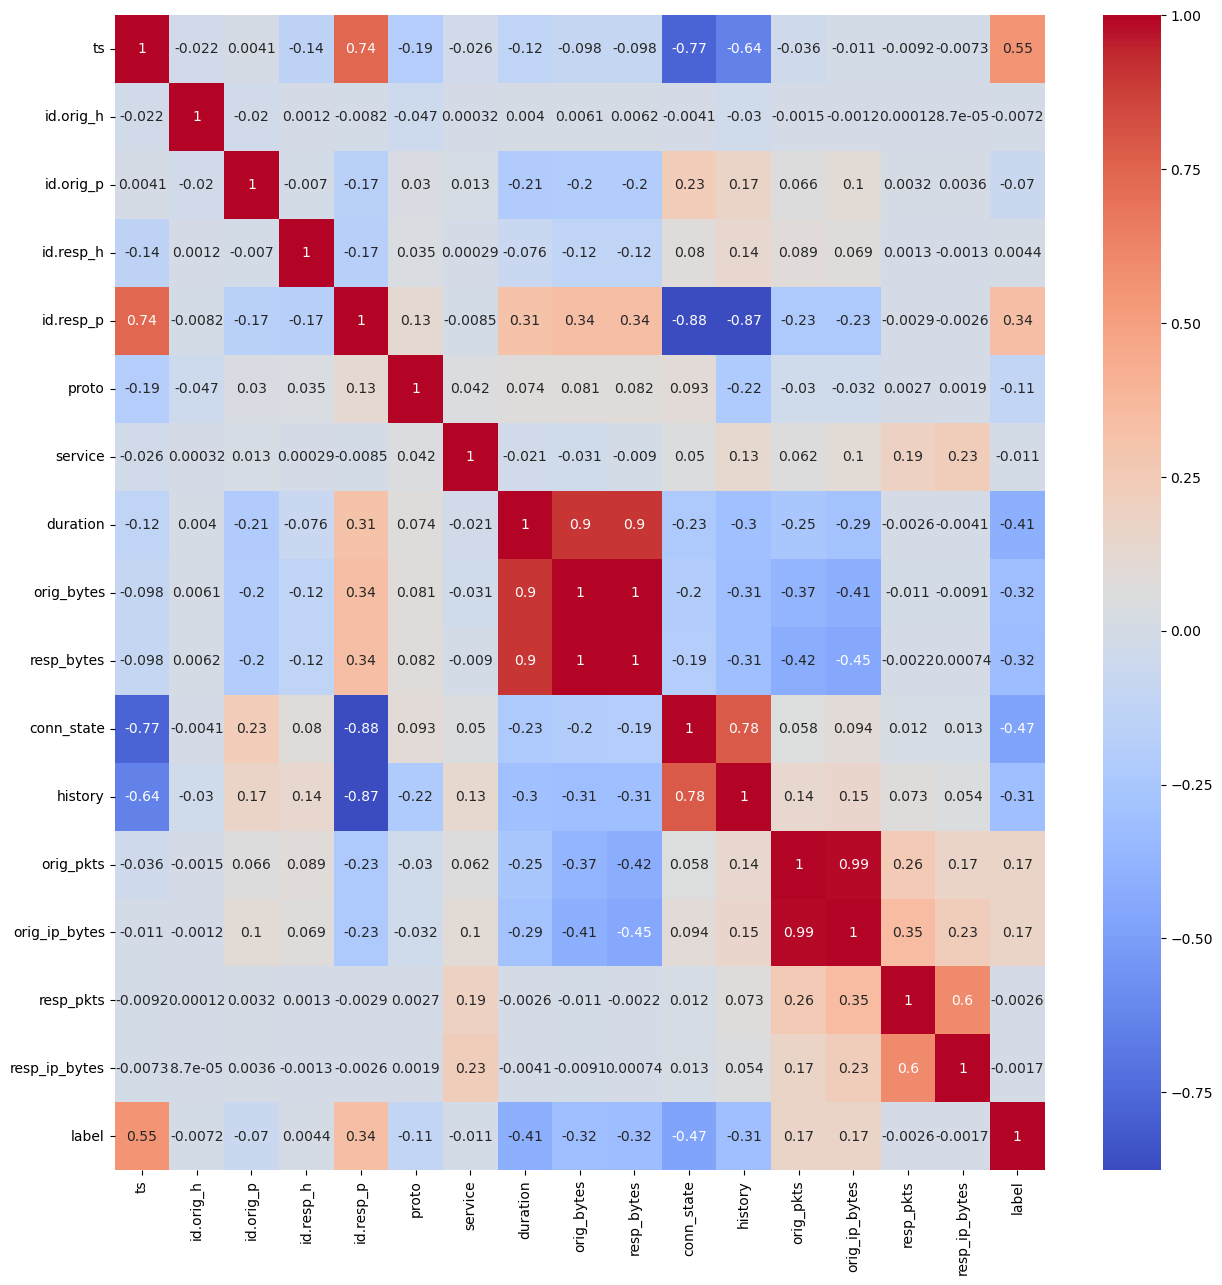

In [28]:
corr_matrix = subset.corr()
plt.figure(figsize=(15, 15))
sub_corr_matrix = corr_matrix[['ts', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p', 'proto',
       'service', 'duration', 'orig_bytes', 'resp_bytes', 'conn_state',
       'history', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes',
       'label']] 
sns.heatmap(sub_corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
sns.pairplot(df, hue='label')
plt.show()

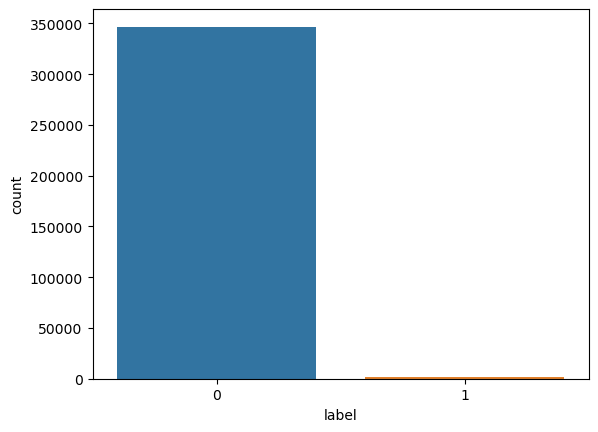

In [3]:
sns.countplot(data=df, x='label')
plt.show()

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

In [44]:
X_test = df[['ts', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p', 'proto',
       'service', 'duration', 'orig_bytes', 'resp_bytes', 'conn_state',
       'history', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes']]
y_test = df['label']

y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%


In [9]:
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [12]:
import pickle
pickle.dump(rf_classifier,open('conmodel.pkl','wb'))

In [16]:
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) 
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%


In [50]:
X = df[['ts', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p', 'proto',
       'service', 'duration', 'orig_bytes', 'resp_bytes', 'conn_state',
       'history', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes']]
y = df['label']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [51]:
from sklearn.model_selection import cross_val_score
rf_classifier = RandomForestClassifier(n_estimators=7, max_depth=10, max_features='log2', oob_score=True)
k = 5 
scores = cross_val_score(rf_classifier, X, y, cv=k, scoring='accuracy')  

for fold, score in enumerate(scores, 1):
    print(f'Fold {fold}: Accuracy = {score:.2f}')

mean_accuracy = scores.mean()
std_deviation = scores.std()
print(f'Mean Accuracy: {mean_accuracy:.2f}')
print(f'Standard Deviation: {std_deviation:.2f}')

C:\Users\ditis\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\ditis\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ditis\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ditis\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\ditis\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees

Fold 1: Accuracy = 0.97
Fold 2: Accuracy = 1.00
Fold 3: Accuracy = 1.00
Fold 4: Accuracy = 0.95
Fold 5: Accuracy = 0.67
Mean Accuracy: 0.92
Standard Deviation: 0.13
